**Fin 585**  
**Diether**  
**Problem Set**  
**Introduction to Portfolios**  c
**Application: Short Selling**

**Overview**

This problem set is introduces you to portfolio construction using a real portfolio application from the Finance literature. This assignment builds on the concepts and code I introduced last time in class. I think you'll find the Intro to Portfolios' Jupyter notebook helpful for this assignment.


**Short Selling Background**

When someone shorts a stock, they profit if the price of the stock goes down instead of going up, but short-selling transactions are more complicated than going long (buying a stock and then later selling it).  There are four basic steps to short selling:

1. *The short seller borrows the desired number of shares from someone.* This is usually done by the broker who locates the shares and the broker becomes the middleman for the short seller and the lender (note, the broker is often both the middleman and the lender). The lender expects to be paid interest on the loan which is the main cost of shorting. The loan is callable by the lender at any time. The short seller can repay the loan at any time. 

2. *The short seller sells the shares.* The proceeds are put into an interest-bearing account called the collateral account. Most lenders require the collateral account to contain 102% of the value of the proceeds.  The collateral account usually invests in low risk, short term securities (e.g., Treasury bills). When the short seller borrows the stock there are lending fees; the short seller pays interest on the loan. Typically, the interest rate is small. The overall interest rate earned on the collateral account is split between the lender and the short seller. The portion of the interest rate received by the short seller is called the rebate rate. The **loan fee** is the portion paid the lender, and is equivalent to the interest rate the short seller pays on the loan. Therefore, the **loan fee** is the main direct cost of shorting. There can be a zero or negative rebate rate; a negative rebate rate corresponds to a situation where the lender receives all the interest in the collateral account and the short sellers pays additional interest out of her pocket to the lender.

3. *Pay any dividends while the loan is open.* The short seller must pay to the lender the cash equivalent of any dividends paid out on the stock. If you short Apple, and Apple pays a 2 dollar dividend per share during the time you short the stock, then you owe the lender 2 dollars for every share you shorted.

4. *Buy the shares back.* The short sellers profits are the following:
$$
Profit = Sell - Buy -(Interest \ Paid)
$$ 
  
The Finance literature has been interested in whether short sellers have good information. Do short sellers typically make money when the short? If loan fees are high, then short sellers are paying a high price to short (bet that the stock will perform poorly). Therefore, if short sellers are paying a lot to short, it likely represents times when short sellers have good information. 

In this problem set you create portfolios based on lagged loan fee to test the preceding hypothesis. Remember, the returns in the data are from going long (buying and then selling the stock). Your portfolios will reflect that fact. If the returns are really low or negative for a portfolio, then that means the short sellers are experiencing high returns.


**Data**

The data are monthly stock data for all stocks in the U.S. with non-missing loan fee data. The basic unit of observation is the stock month. You can download the data directly using the following link: [the data](https://diether.org/prephd/03-mstk_short_02-12.csv). There is also a link on *Learning Suite*. The data contain the following variables:

|Variable | Description                                       |
|---------|---------------------------------------------------|
|permno   | stock identifier                                  |
|caldt    | calendar date                                     |
|ret      | monthly return                                    |
|prclag   | stock price, lagged                               |   
|melag    | market equity, lagged                             |
|feelag   | the loan fee expressed a percent per anum, lagged |


**Tasks and Questions**  

1. What is the sample period of this data?

2. There are some observations where `feelag` is less than zero. These are data errors. Remove these observation from the dataframe and then compute the summary statistics for `feelag`.

3. Output the median and 90th percentile of `feelag` for every month. This can be done in seperate commands. 

4. Construct three equal-weight portfolios using `feelag` a the criterion variable. Portfolio 0: an equal-weight portfolio the includes all stocks with `feelag` less than or equal to 3% (loan fee are express as the interest rate per anum). Portfolio 1: an equal-weight portfolio the includes all stocks with `feelag` greater than 3% and less than or eqal to 5%. Portfolio 2: an equal-weight portfolio the includes stocks with `feelag` greater than 5% (loan fee are express as the interest rate per anum). Hint: use the pd.cut to bin the data and use my Jupyter notebook from last class as a guide.

5. Compute summary statistics for each of the portfolios you created including the mean, standard deviation, and t-statistics testing of the mean return of the portfolio is zero.

5. Are your results consistent with the hypothesis that short sellers have good information?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("03-mstk_short_02-12.csv",parse_dates=['caldt'])
df

,permno,caldt,ret,prclag,melag,feelag
0,10001,2005-06-30,0.128430,8.02,21.053,0.15000
1,10001,2005-07-29,0.009945,9.05,26.363,0.32701
2,10001,2005-08-31,0.039387,9.14,26.625,0.15000
3,10001,2005-10-31,-0.119040,11.51,33.529,0.16250
4,10001,2005-11-30,-0.059397,10.10,29.421,0.15000
...,...,...,...,...,...,...
437770,93436,2012-03-30,0.114640,33.41,3494.800,13.73900
437771,93436,2012-04-30,-0.110370,37.24,3916.300,18.09700
437772,93436,2012-05-31,-0.109570,33.13,3485.700,13.02700
437773,93436,2012-06-29,0.060678,29.50,3103.800,10.79800


**Q1.** sample period of this data

In [3]:
df['caldt'].min()

Timestamp('2002-06-28 00:00:00')

In [4]:
df['caldt'].max()

Timestamp('2012-07-31 00:00:00')

In [5]:
df['caldt'].describe()[['min','max']]

min    2002-06-28 00:00:00
max    2012-07-31 00:00:00
Name: caldt, dtype: object

**Q2.** Remove observation where feelag < 0

In [6]:
df['feelag'].describe().round(4)

count    437775.0000
mean          0.9837
std           3.6919
min          -4.8500
25%           0.0875
50%           0.1484
75%           0.3224
max          98.1800
Name: feelag, dtype: float64

In [7]:
df = df.query("feelag > -0.000001").reset_index(drop=True)
df

,permno,caldt,ret,prclag,melag,feelag
0,10001,2005-06-30,0.128430,8.02,21.053,0.15000
1,10001,2005-07-29,0.009945,9.05,26.363,0.32701
2,10001,2005-08-31,0.039387,9.14,26.625,0.15000
3,10001,2005-10-31,-0.119040,11.51,33.529,0.16250
4,10001,2005-11-30,-0.059397,10.10,29.421,0.15000
...,...,...,...,...,...,...
419495,93436,2012-03-30,0.114640,33.41,3494.800,13.73900
419496,93436,2012-04-30,-0.110370,37.24,3916.300,18.09700
419497,93436,2012-05-31,-0.109570,33.13,3485.700,13.02700
419498,93436,2012-06-29,0.060678,29.50,3103.800,10.79800


In [8]:
df['feelag'].describe().round(4)

count    419500.0000
mean          1.0307
std           3.7643
min           0.0000
25%           0.0950
50%           0.1500
75%           0.3618
max          98.1800
Name: feelag, dtype: float64

**Q3.** 90th percentile of `feelag` for every month

In [9]:
df.groupby('caldt')['feelag'].quantile([0.5,0.9])

caldt          
2002-06-28  0.5    0.442105
            0.9    1.875000
2002-07-31  0.5    0.250000
            0.9    1.555370
2002-08-30  0.5    0.250000
                     ...   
2012-05-31  0.9    3.595600
2012-06-29  0.5    0.109820
            0.9    3.911920
2012-07-31  0.5    0.099295
            0.9    4.195350
Name: feelag, Length: 244, dtype: float64

In [10]:
df.groupby('caldt')['feelag'].quantile([0.5,0.9]).unstack(level=1)

,0.5,0.9
caldt,,
2002-06-28,0.442105,1.87500
2002-07-31,0.250000,1.55537
2002-08-30,0.250000,1.62500
2002-09-30,0.227160,1.75000
2002-10-31,0.189690,1.39574
...,...,...
2012-03-30,0.104045,3.44536
2012-04-30,0.099750,3.43792
2012-05-31,0.108170,3.59560


<Axes: xlabel='caldt'>

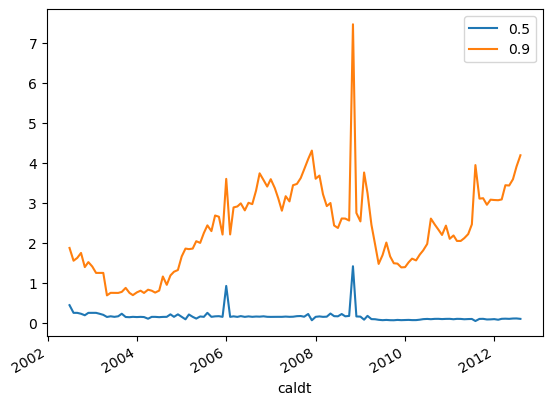

In [11]:
df.groupby('caldt')['feelag'].quantile([0.5,0.9]).unstack(level=1)[[0.5,0.9]].plot()

**Q4. Form feelag based portfolios**

In [12]:
df['bins'] = pd.cut(df['feelag'],[-0.01,3,5,100],labels=False)
df

,permno,caldt,ret,prclag,melag,feelag,bins
0,10001,2005-06-30,0.128430,8.02,21.053,0.15000,0
1,10001,2005-07-29,0.009945,9.05,26.363,0.32701,0
2,10001,2005-08-31,0.039387,9.14,26.625,0.15000,0
3,10001,2005-10-31,-0.119040,11.51,33.529,0.16250,0
4,10001,2005-11-30,-0.059397,10.10,29.421,0.15000,0
...,...,...,...,...,...,...,...
419495,93436,2012-03-30,0.114640,33.41,3494.800,13.73900,2
419496,93436,2012-04-30,-0.110370,37.24,3916.300,18.09700,2
419497,93436,2012-05-31,-0.109570,33.13,3485.700,13.02700,2
419498,93436,2012-06-29,0.060678,29.50,3103.800,10.79800,2


In [13]:
port = df.groupby(['caldt','bins'])['ret'].mean()*100
port = port.unstack(level='bins')
port

bins,0,1,2
caldt,,,
2002-06-28,-10.588252,-18.555083,-6.139767
2002-07-31,-13.163341,-17.002857,11.725500
2002-08-30,-0.296823,10.760344,6.400025
2002-09-30,-11.961998,-15.422047,-10.107712
2002-10-31,8.527226,14.396513,14.005900
...,...,...,...
2012-03-30,3.531022,1.066061,1.285109
2012-04-30,-1.138087,-0.445283,-3.732664
2012-05-31,-6.634287,-8.444243,-12.695642


**Q5. Portfolio Summary Statistics**

In [14]:
port.describe().round(3)

bins,0,1,2
count,122.000,122.000,122.000
mean,0.973,-0.128,-0.766
std,6.547,9.464,9.395
min,-21.638,-22.926,-22.174
25%,-2.316,-5.606,-6.164
50%,1.502,-0.276,-0.811
75%,4.291,3.886,3.622
max,22.716,33.765,26.526


In [15]:
from finance_byu.summarize import summary
summary(port).round(3)

bins,0,1,2
count,122.000,122.000,122.000
mean,0.973,-0.128,-0.766
std,6.547,9.464,9.395
tstat,1.642,-0.150,-0.900
pval,0.103,0.881,0.370
min,-21.638,-22.926,-22.174
25%,-2.316,-5.606,-6.164
50%,1.502,-0.276,-0.811
75%,4.291,3.886,3.622
max,22.716,33.765,26.526


In [16]:
from finance_byu.summarize import summary
summary(port).loc[['count','mean','std','tstat']].round(3)

bins,0,1,2
count,122.000,122.000,122.000
mean,0.973,-0.128,-0.766
std,6.547,9.464,9.395
tstat,1.642,-0.150,-0.900


**Q6. Do short sellers have good information?**

Are short sellers acting on good information that predicts declines in security prices? If so, securities with high short selling demand should have low next period returns. Right now (given what we've covered so far), we can't really tell. We haven't talked or modeled what the expected return on stocks should be and why (risk, the answer is risk). We can tell that the high lagged loan fee has the lowest average return; that's certainly consistent with the hypothesis. But that average isn't significant below zero (t-stat = -0.91). Remember, these are normal (long/buy) portfolios. The `high` portfolio is constructed as if the investor bought it. A negative average return means the high short costs predict low future average returns which is consistent with short-sellers picking stocks that go down on average

However, we can sharpen up our testing by thinking of a simple strategy where where we short 1000 dollars worth of portfolio `high` and then use the proceeds to invest 1000 dollars in portfolio `low`. This is called a pairs trade, and the return on the new portfolio is the following:
$$
r_{spread} = r_{low} - r_{high}
$$

In [17]:
port['spread'] = port[0] - port[2]
summary(port).loc[['count','mean','std','tstat','pval']].round(3)

bins,0,1,2,spread
count,122.000,122.000,122.000,122.000
mean,0.973,-0.128,-0.766,1.739
std,6.547,9.464,9.395,5.393
tstat,1.642,-0.150,-0.900,3.561
pval,0.103,0.881,0.370,0.001
